### Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering


# HC3 :  Illustrative, synthetic datasets

(a) Successfully cluster the balls data using hierarchical clustering.

Plot the dendrogram: how many clusters would be reasonable by its inspection?

Try out different linkage options: do all of them work well?

(b) Successfully cluster the twoMoons data using hierarchical clustering.

Plot the dendrogram: how many clusters would be reasonable by its inspection?

Try out different linkage options: do all of them work well?

In [3]:
class DendrogramPlotter:
    def __init__(self, dataset, method='ward'):
        self.dataset = dataset
        self.method = method

    def calculate_dynamic_cut(self, Z, n_clusters):
        max_distance = Z[:, 2]
        distance_threshold = np.max(max_distance)


        for i in range(len(max_distance) - 1, 0, -1):
            # generate clusters for current distance threshold
            clusters = fcluster(Z, t=max_distance[i], criterion='distance')
            if len(np.unique(clusters)) == n_clusters:
                distance_threshold = max_distance[i]
                break

        return distance_threshold

    def plot_dendrogram(self, ax, n_clusters, make_cut=True):
        Z = linkage(self.dataset, method=self.method)

        dendrogram(Z, ax=ax)
        ax.set_title(f'Dendrogram ({self.method} linkage)')
        ax.set_xlabel('Samples')
        ax.set_ylabel('Euclidean Distance')
        ax.set_xticks([])

        if make_cut:
            distance_threshold = self.calculate_dynamic_cut(Z, n_clusters)

            # add line to the
            ax.axhline(y=distance_threshold, color='r', linestyle='--')

class HCCluster:
    def __init__(self, dataset, n_clusters, linkage_method='single'):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.linkage_method = linkage_method

    def cluster(self):
        model = AgglomerativeClustering(n_clusters=self.n_clusters, linkage=self.linkage_method)
        model.fit(self.dataset)
        return model.labels_

    def plot_clusters(self, ax):
        labels = self.cluster()
        sns.scatterplot(x=self.dataset['x'], y=self.dataset['y'], hue=labels, palette="viridis", style=labels, s=60, ax=ax)
        ax.set_title('Clusters')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend(title='Cluster')

## a) Balls dataset

In [4]:
# loading dataset
balls_data = pd.read_csv('dataBalls.csv')
balls_data.head()

,x,y
0,-0.202969,-1.520712
1,-0.545900,-2.165577
2,0.347952,-2.267513
3,-0.039389,-2.429920
4,-0.130040,-2.202356


### Scatterplot

Text(0, 0.5, 'y')

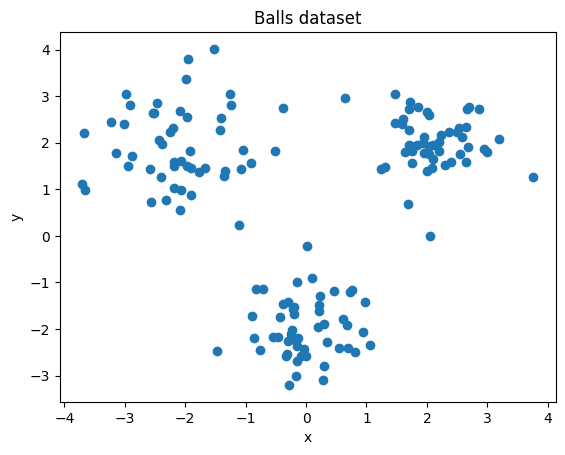

In [5]:
plt.scatter(balls_data['x'], balls_data['y'])
plt.title('Balls dataset')
plt.xlabel('x')
plt.ylabel('y')

### Dendogram

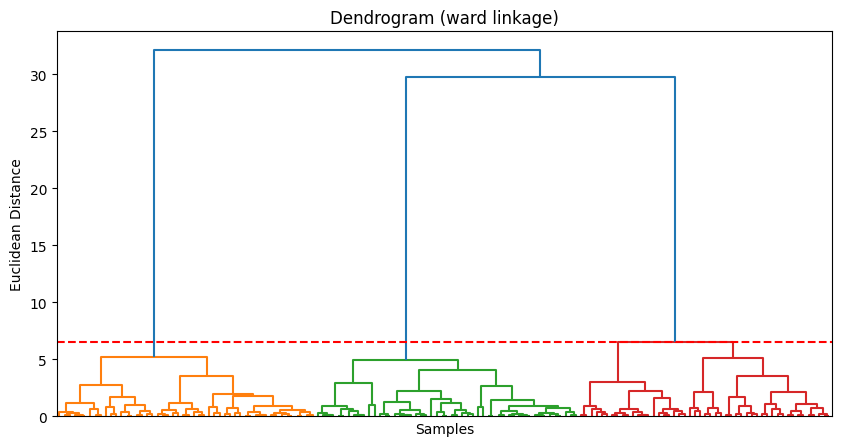

In [6]:
ballsDendogram = DendrogramPlotter(balls_data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ballsDendogram.plot_dendrogram(ax, 3)

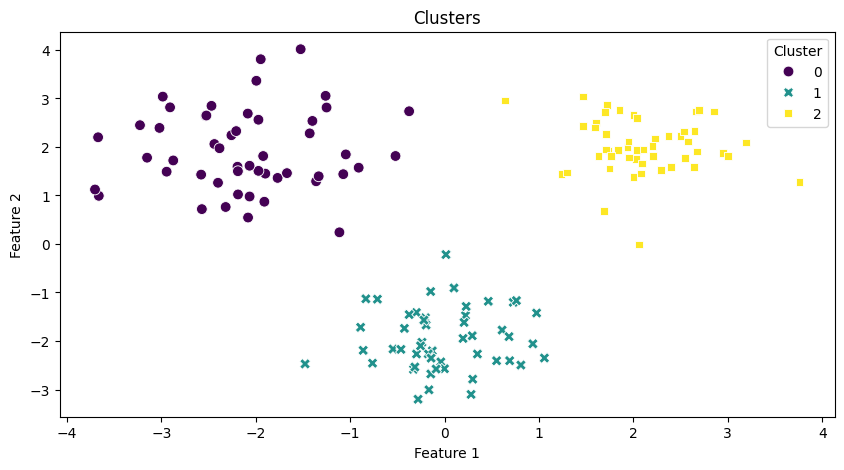

In [7]:
ballsHC = HCCluster(balls_data, 3)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ballsHC.plot_clusters(ax)

#### Testing different linkage options

In [8]:
def dendrogram_cluster(dataset, method='ward', n_cluster=3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    dendrogram_plotter = DendrogramPlotter(dataset, method)
    dendrogram_plotter.plot_dendrogram(ax1, n_clusters=n_cluster)

    hc_cluster = HCCluster(dataset, n_clusters=n_cluster, linkage_method=method)
    hc_cluster.plot_clusters(ax2)

    plt.tight_layout()
    plt.show()



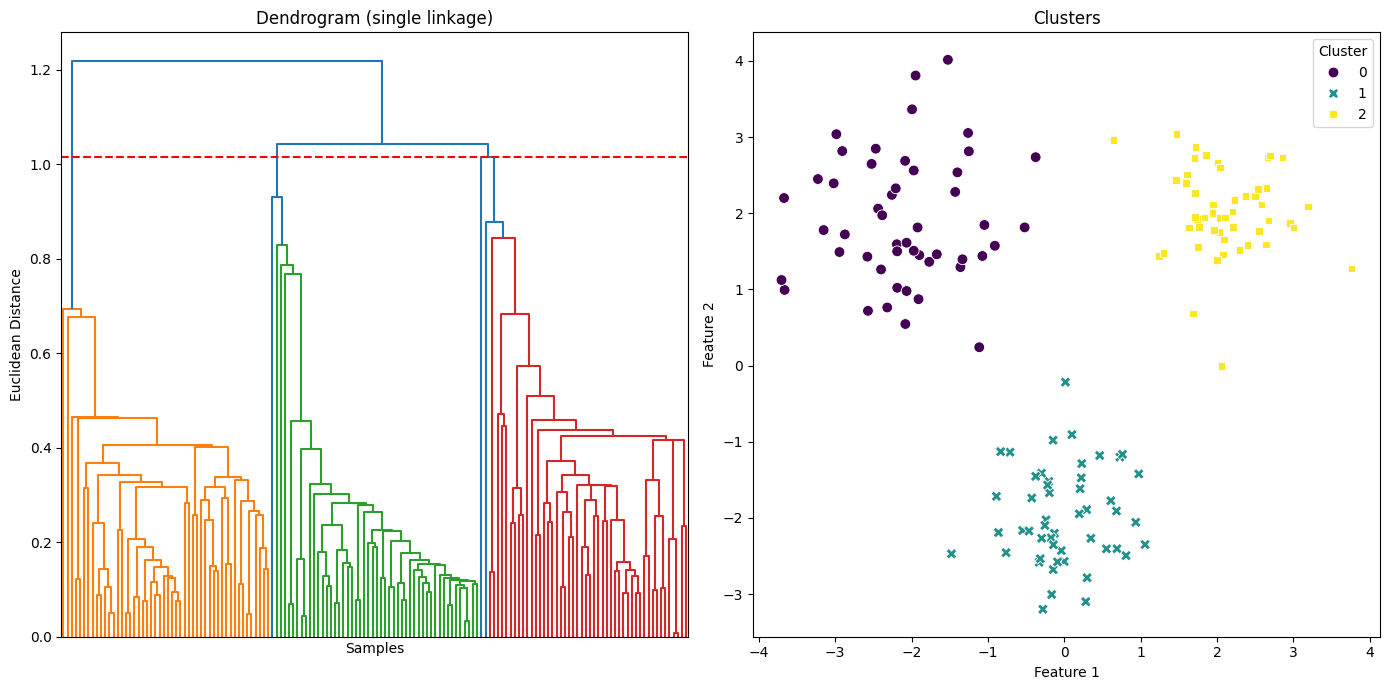

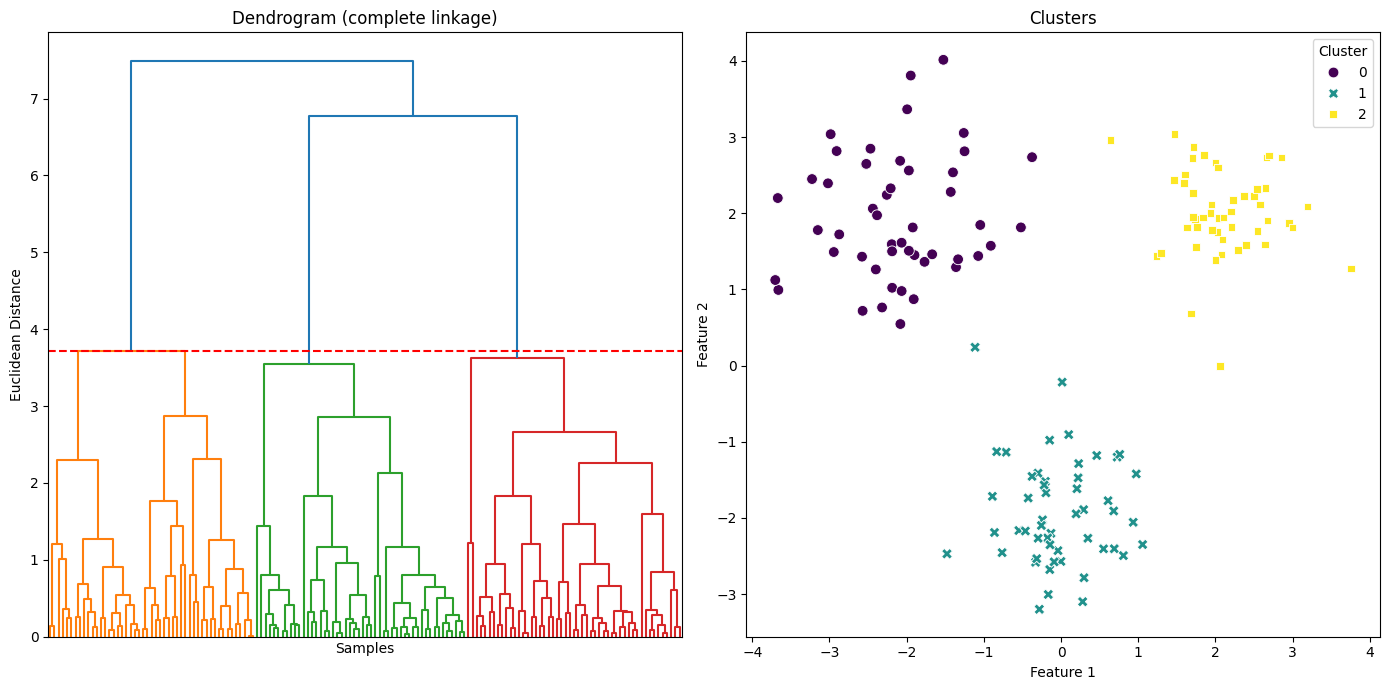

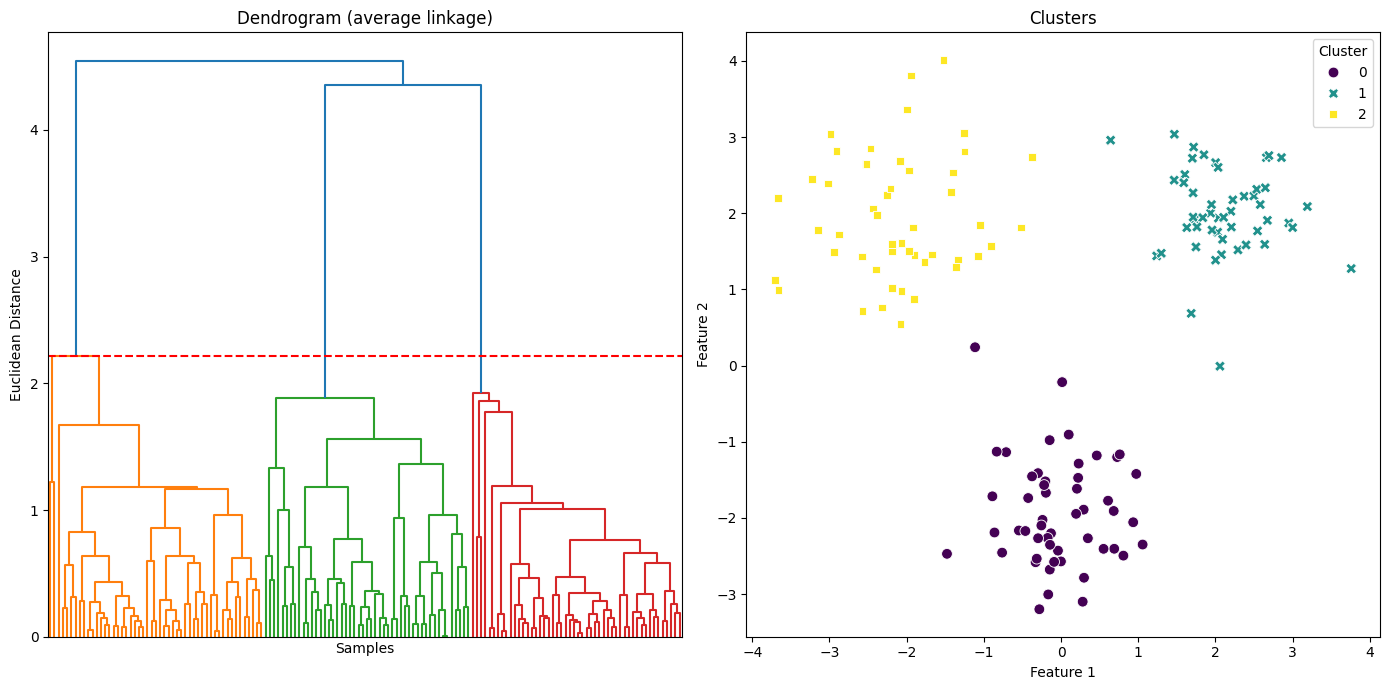

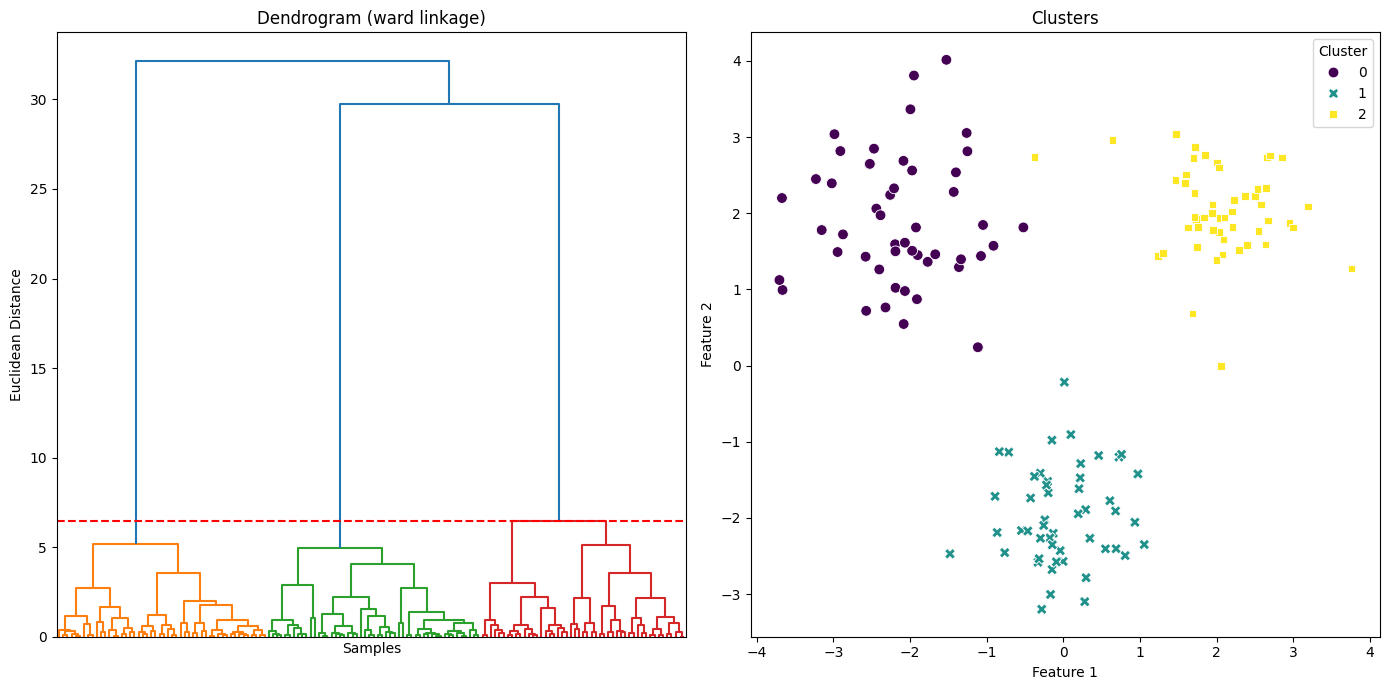

In [9]:
methods = ['single', 'complete', 'average', 'ward']
for method in methods:
    dendrogram_cluster(balls_data, method)


## b) TwoMoons dataset

In [10]:
# loading dataset
twomoons_data = pd.read_csv('twoMoons.csv')
twomoons_data.head()

,x,y
0,-5.1226,0.7478
1,-4.6440,1.9530
2,5.8056,-2.0327
3,-3.7811,2.5167
4,4.4117,-2.6287


### Scatterplot

Text(0, 0.5, 'y')

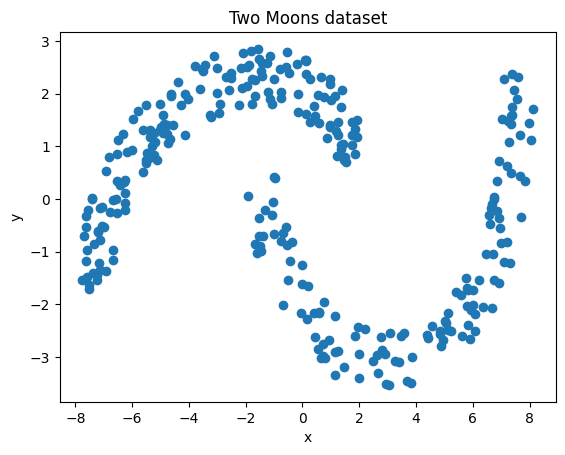

In [11]:
plt.scatter(twomoons_data['x'], twomoons_data['y'])
plt.title('Two Moons dataset')
plt.xlabel('x')
plt.ylabel('y')


### Dendogram

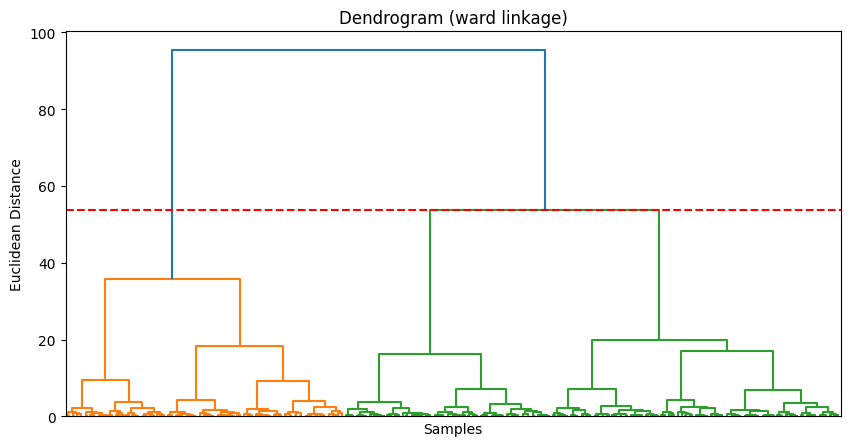

In [12]:
twomoons_dendogram = DendrogramPlotter(twomoons_data)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
twomoons_dendogram.plot_dendrogram(ax, 2)

### Clustering

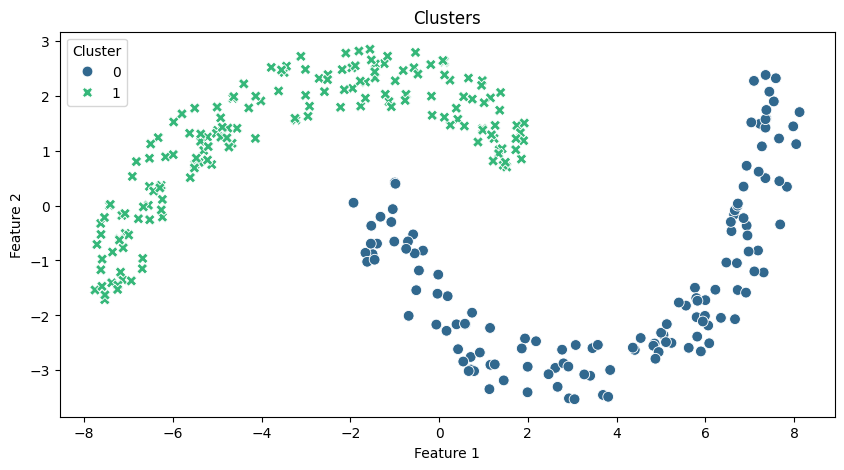

In [13]:
twomoons_cluster = HCCluster(twomoons_data, 2)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
twomoons_cluster.plot_clusters(ax)

### Trying different methods

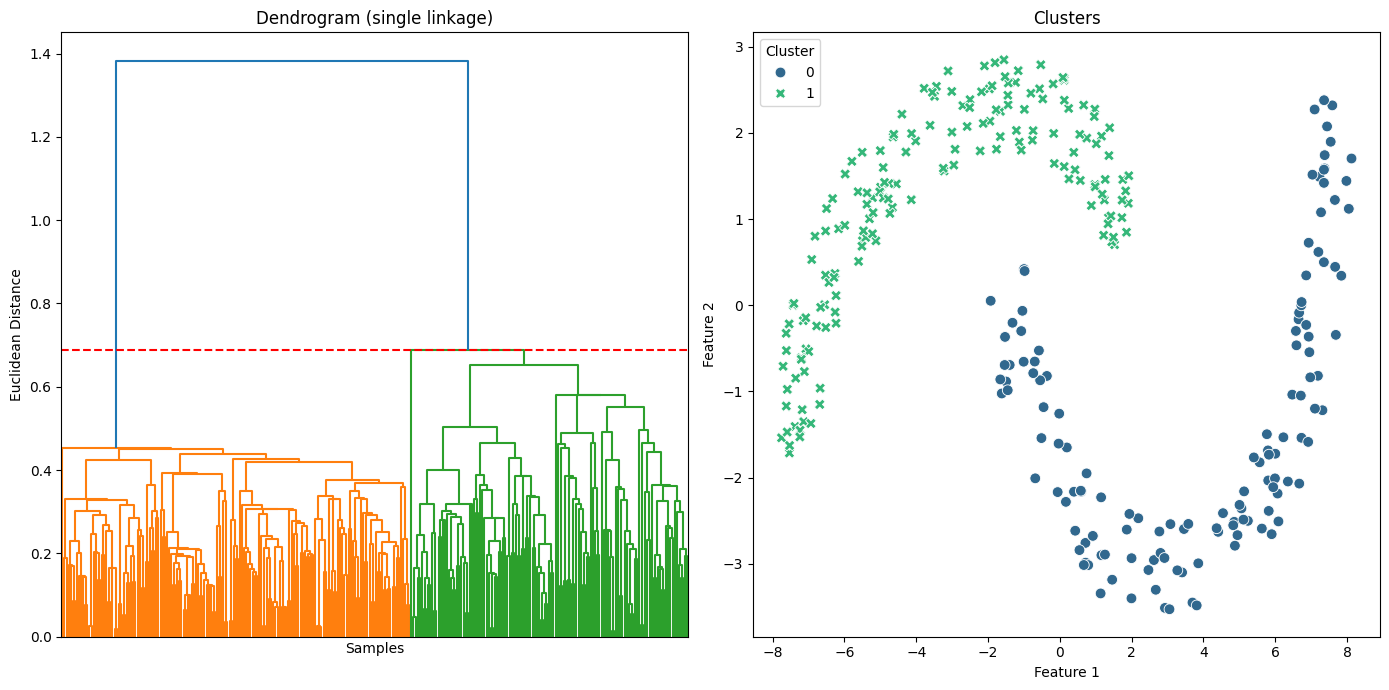

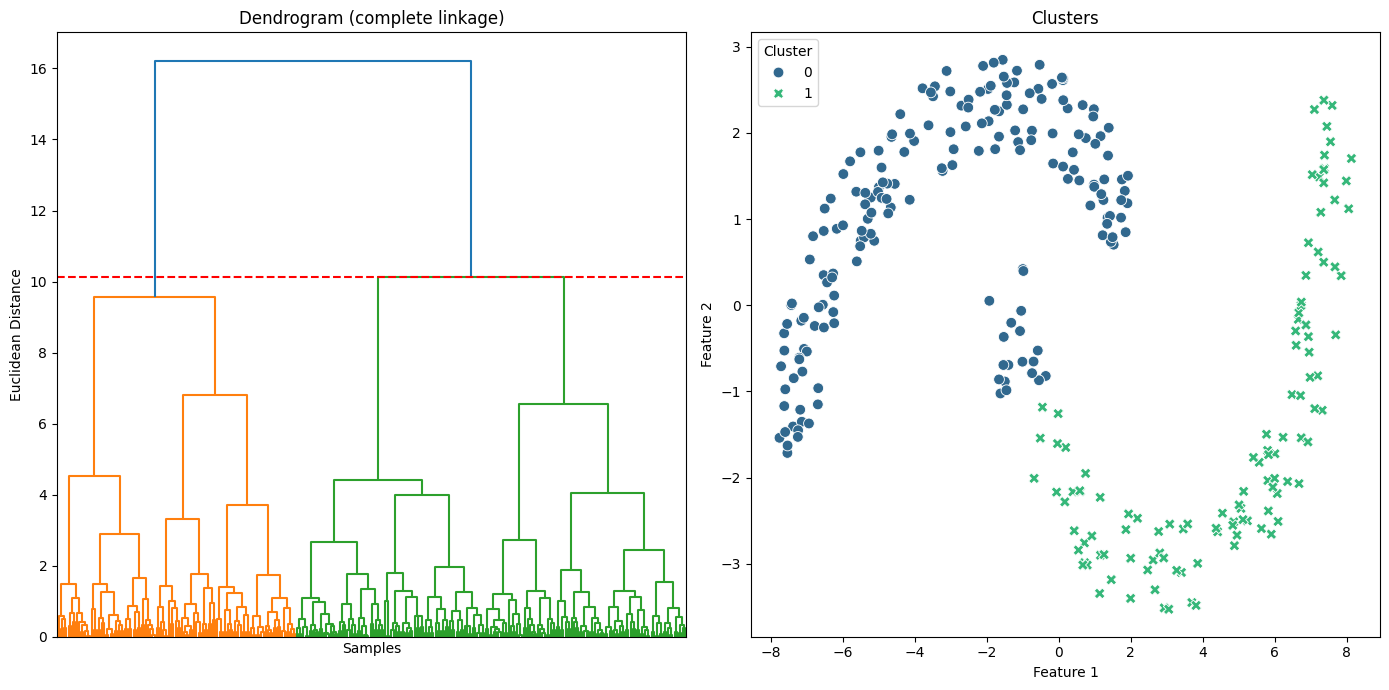

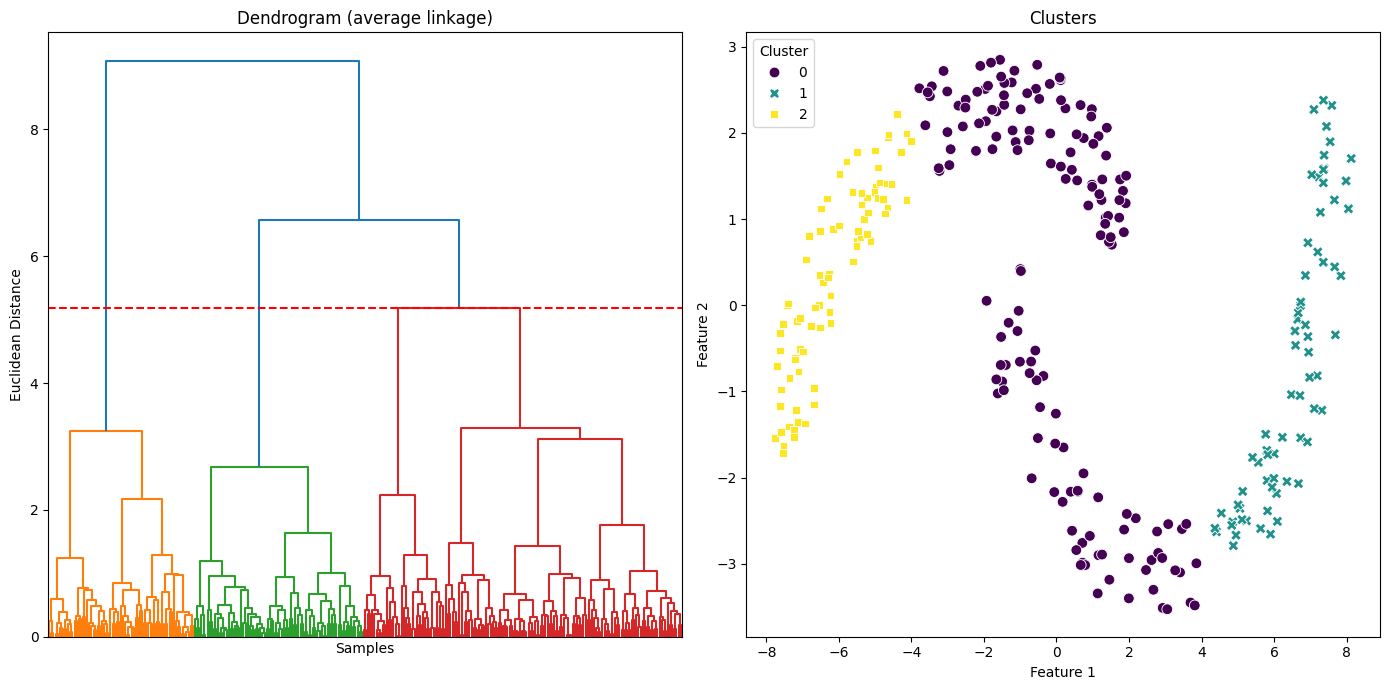

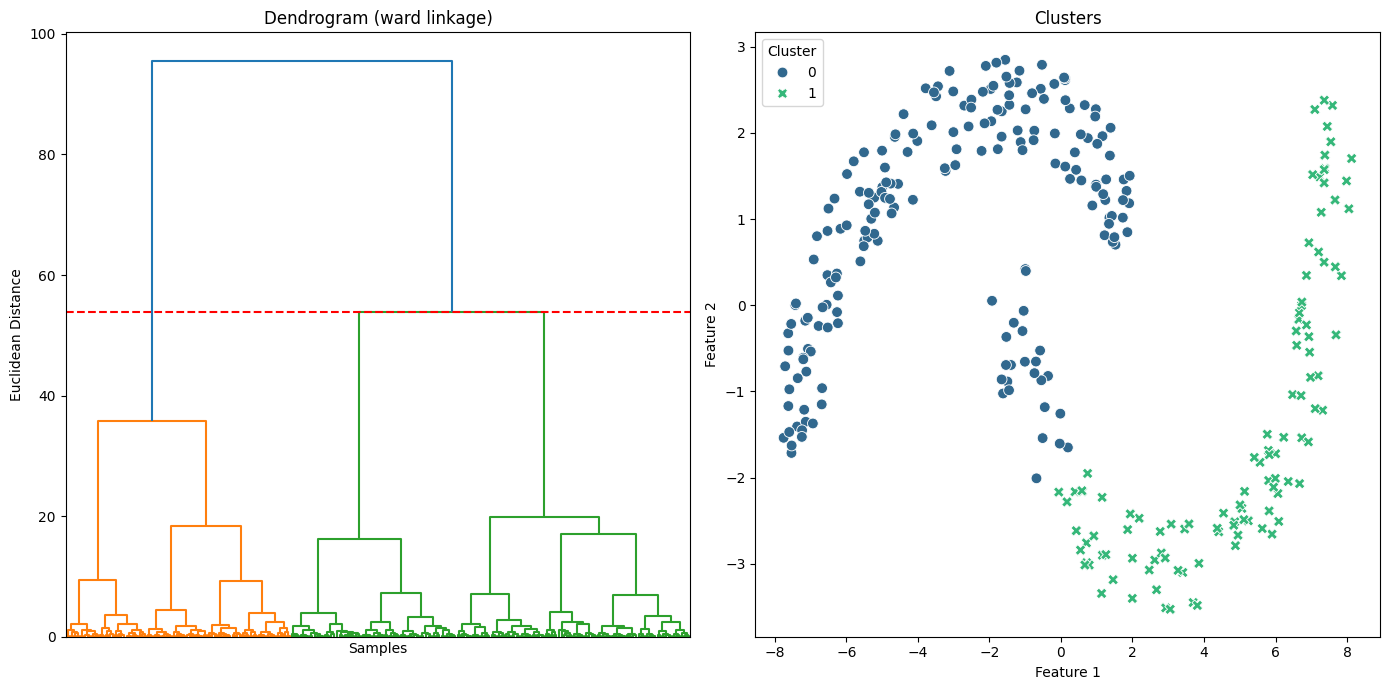

In [14]:
methods = ['single', 'complete', 'average', 'ward']
n_clusters = [2, 2, 3, 2]
for index, method in enumerate(methods):
    dendrogram_cluster(twomoons_data, method, n_clusters[index])


- In Two Moons dataset we can see that all types of linkages gives us in result two clusters excpet for average linkage which gives us 3
- For the Ball dataset every type of linkage gives 3 clusters 

### Circles Dataset

In [16]:
circles = pd.read_csv('dataCircles.csv')
circles.head()

,x,y
0,-0.180736,0.729611
1,0.154802,-1.072998
2,0.191250,-0.979264
3,0.036093,-0.790743
4,1.058191,-0.030355


#### Scatter plot

Text(0, 0.5, 'y')

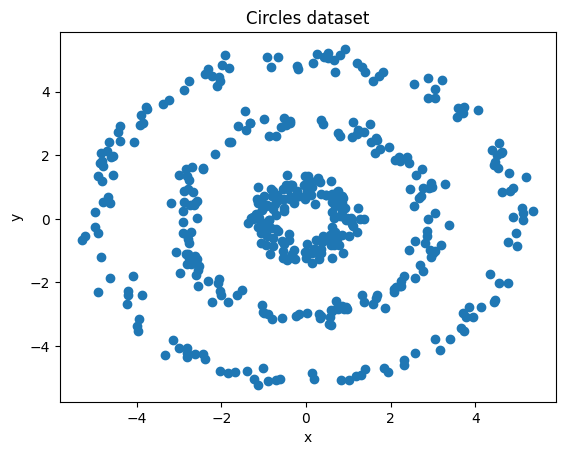

In [17]:
plt.title('Circles dataset')
plt.scatter(circles['x'], circles['y'])
plt.xlabel('x')
plt.ylabel('y')


#### Dendogram

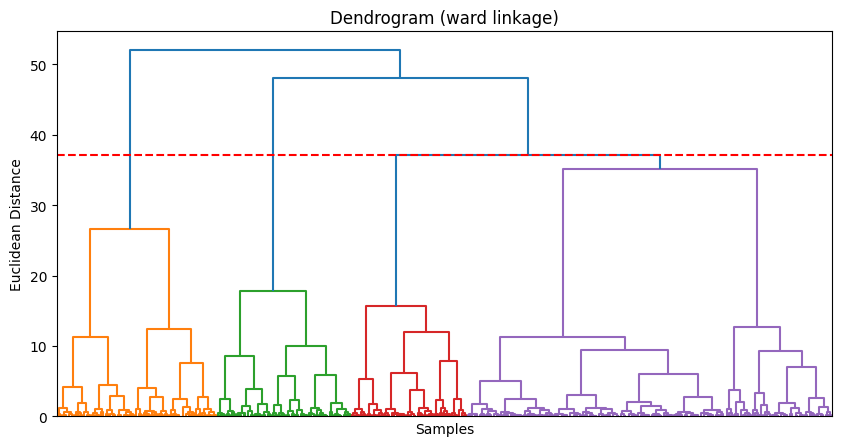

In [24]:
circles_dendogram = DendrogramPlotter(circles, method='ward')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
circles_dendogram.plot_dendrogram(ax, 3)

### Clustering

In [41]:
def plot_subplots_circles_data(n):
    fig, ax = plt.subplots(2,2 , figsize=(10, 10))
    methods = ['single', 'complete', 'average', 'ward']

    ax.flatten()

    for method in methods :
        circles_hc = HCCluster(circles, n, method)
        curr_ax = ax.flatten()[methods.index(method)]
        circles_hc.plot_clusters(curr_ax)

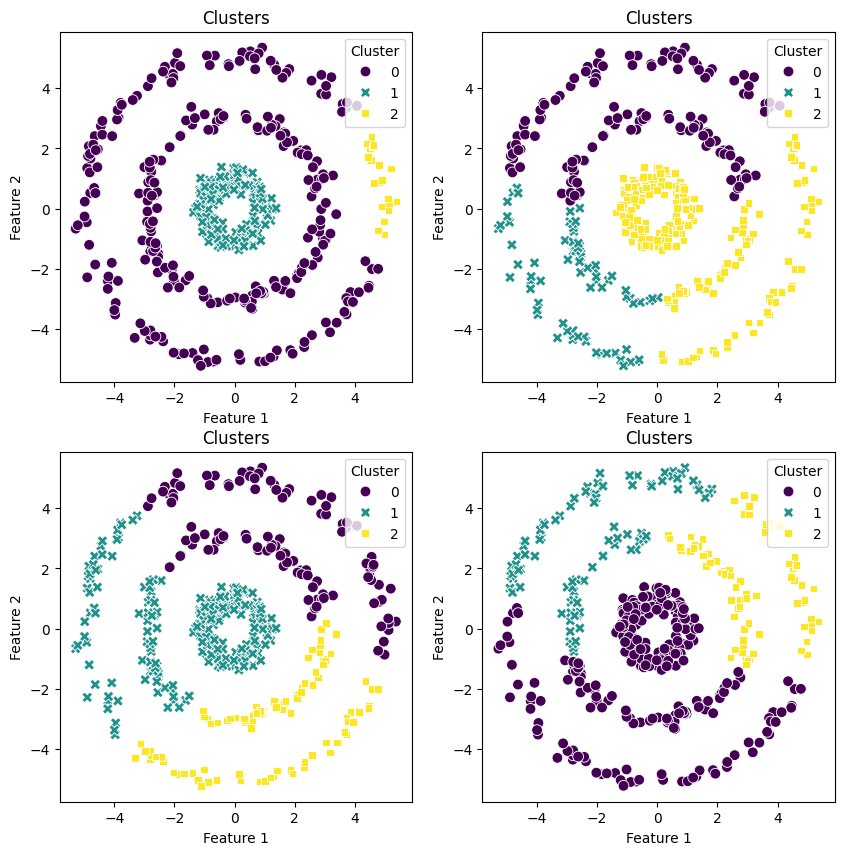

In [42]:
plot_subplots_circles_data(3)

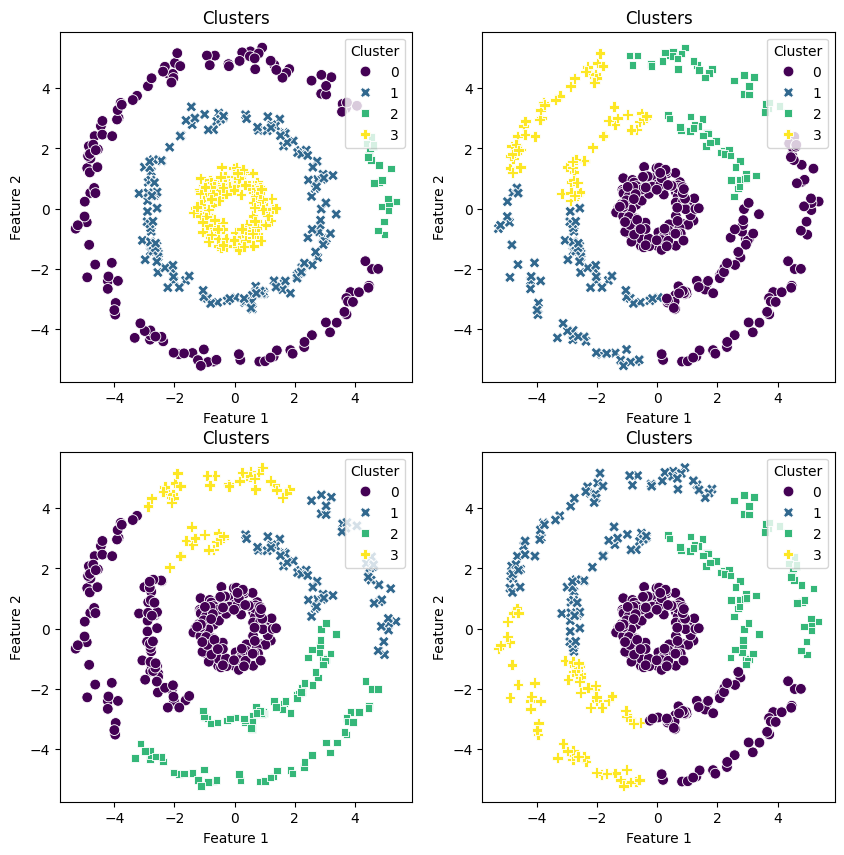

In [43]:
plot_subplots_circles_data(4)

# HC4 : Movies dataset

(a) Cluster the movies dataset with hierarchical clustering choosing a suitable linkage function. Plot the dendrogram: how many clusters would be reasonable by its inspection?

(b) Interpretation of the clustering result: describe the found clusters as for the corresponding kmeans example and try to find out the differences (use 5 clusters again to enable the comparison).

### a)

In [ ]:
# i will not use my classed for this, cause they are strictly amde for 2D data
# loading dataset

movie_dataset = pd.read_csv('movieData.csv')
movie_dataset.head()

,Row,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,"""#7DaysLater"" (2013)",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


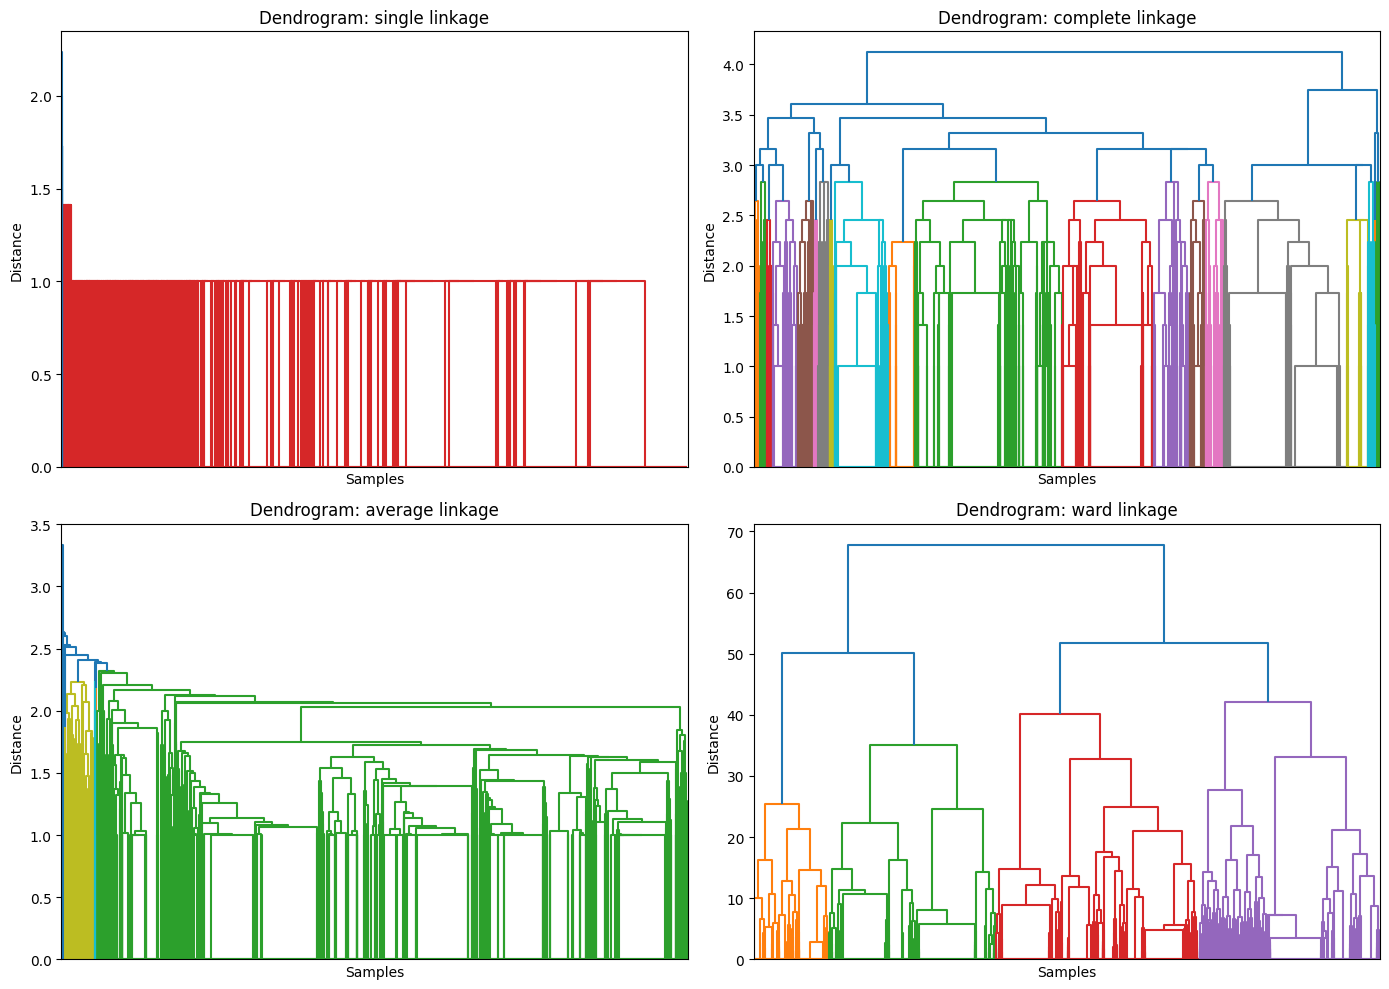

In [ ]:
# extracting values from genres

movie_features = movie_dataset.iloc[:, 1:].values

# select 1000 random samples fro movie_features
sample_indices = np.random.choice(range(len(movie_features)), 10000, replace=False)
selected_samples = movie_features[sample_indices]

methods = ['single', 'complete', 'average', 'ward']
# plotting on subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for index, method in enumerate(methods):
    ax = axes.flatten()[index]
    dendrogram(linkage(selected_samples, method=method), ax=ax)
    ax.set_title(f'Dendrogram: {method} linkage')
    ax.set_xlabel('Samples')
    ax.set_ylabel('Distance')
    ax.set_xticks([])

plt.tight_layout()
plt.show()

### b)
